In [24]:
import numpy as np
import bayesflow as bf
import seaborn as sns
import matplotlib.pyplot as plt
from numba import njit

import sys
sys.path.append("../../src/")
from helpers import CollapsingDDM, NeuralApproximator
from configurations import model_configs

## Hyperbolic No Constraints

In [25]:
model = CollapsingDDM(model_configs['hyperbolic_ddm_no_contraint'])
approximator = NeuralApproximator(model)

INFO:root:Performing 2 pilot runs with the hyperbolic_ddm_no_contraint model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2, 4)
INFO:root:Shape of simulation batch after 2 pilot simulations: (batch_size = 2, 232, 1)
INFO:root:No optional prior non-batchable context provided.
INFO:root:No optional prior batchable context provided.
INFO:root:Could not determine shape of simulation non-batchable context. Type appears to be non-array: <class 'int'>,                                    so make sure your input configurator takes cares of that!
INFO:root:No optional simulation batchable context provided.
INFO:root:Initialized empty loss history.
INFO:root:Initialized networks from scratch.
INFO:root:Performing a consistency check with provided components...
INFO:root:Done.


In [26]:
%%time
x = model.generate(32)

CPU times: user 3.23 s, sys: 947 ms, total: 4.17 s
Wall time: 660 ms


### Prior Push Forward Checks

In [27]:
%%time
example_sim = model.generate(batch_size=32)

CPU times: user 615 ms, sys: 144 ms, total: 759 ms
Wall time: 154 ms


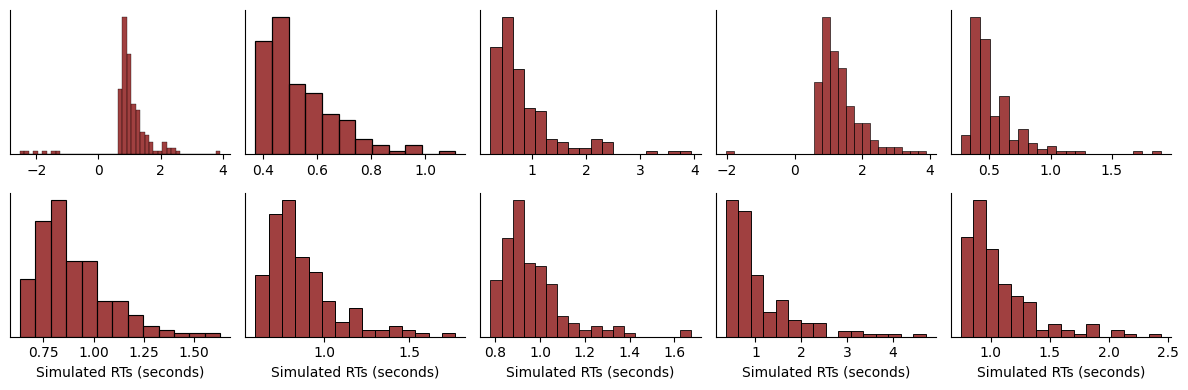

In [28]:
f, axarr = plt.subplots(2, 5, figsize=(12, 4))
for i, ax in enumerate(axarr.flat):
    sns.histplot(example_sim["sim_data"][i, : , 0], color="maroon", alpha=0.75, ax=ax)
    sns.despine(ax=ax)
    ax.set_ylabel("")
    ax.set_yticks([])
    if i > 4:
        ax.set_xlabel("Simulated RTs (seconds)")
f.tight_layout()

### Train Model

In [ ]:
history = approximator.run()

### Validation

In [15]:
val_sim = model.generate(1000)
true_params = val_sim["prior_draws"]

In [16]:
val_data = model.configure(val_sim)

In [17]:
post_samples = approximator.amortizer.sample(val_data, n_samples=2000)

In [18]:
pred_params = post_samples * model.prior_stds + model.prior_means

In [ ]:
f = bf.diagnostics.plot_recovery(
    pred_params, true_params,
    param_names=model.prior.param_names,
    uncertainty_agg=None
)

## Ndt Constraint

In [ ]:
model = CollapsingDDM(model_configs['hyperbolic_ndt_contraint'])
approximator = NeuralApproximator(model)

In [ ]:
history = approximator.run()

In [5]:
val_sim = model.generate(1000)
true_params = val_sim["prior_draws"]

In [6]:
val_data = model.configure(val_sim)

In [7]:
post_samples = approximator.amortizer.sample(val_data, n_samples=2000)

In [8]:
pred_params = post_samples * model.prior_stds + model.prior_means

In [ ]:
f = bf.diagnostics.plot_recovery(
    pred_params, true_params,
    param_names=model.prior.param_names,
    uncertainty_agg=None
)

## Exponential no constraint

In [ ]:
model = CollapsingDDM(model_configs['exponential_no_contraint'])
approximator = NeuralApproximator(model)

### Prior Push Forward Check

In [ ]:
%%time
example_sim = model.generate(batch_size=32)

In [ ]:
f, axarr = plt.subplots(2, 5, figsize=(12, 4))
for i, ax in enumerate(axarr.flat):
    sns.histplot(example_sim["sim_data"][i, : , 0], color="maroon", alpha=0.75, ax=ax)
    sns.despine(ax=ax)
    ax.set_ylabel("")
    ax.set_yticks([])
    if i > 4:
        ax.set_xlabel("Simulated RTs (seconds)")
f.tight_layout()

### Train Model

In [ ]:
history = approximator.run(75)

### Validation

In [7]:
val_sim = model.generate(1000)
true_params = val_sim["prior_draws"]

In [8]:
val_data = model.configure(val_sim)

In [9]:
post_samples = approximator.amortizer.sample(val_data, n_samples=2000)

In [10]:
pred_params = post_samples * model.prior_stds + model.prior_means

In [ ]:
f = bf.diagnostics.plot_recovery(
    pred_params, true_params,
    param_names=model.prior.param_names,
    uncertainty_agg=None
)

## Exponential no constraint

In [ ]:
model = CollapsingDDM(model_configs['exponential_no_contraint'])
approximator = NeuralApproximator(model)

### Prior Push Forward Check

In [ ]:
%%time
example_sim = model.generate(batch_size=32)

In [ ]:
f, axarr = plt.subplots(2, 5, figsize=(12, 4))
for i, ax in enumerate(axarr.flat):
    sns.histplot(example_sim["sim_data"][i, : , 0], color="maroon", alpha=0.75, ax=ax)
    sns.despine(ax=ax)
    ax.set_ylabel("")
    ax.set_yticks([])
    if i > 4:
        ax.set_xlabel("Simulated RTs (seconds)")
f.tight_layout()

### Train Model

In [ ]:
history = approximator.run(75)

In [ ]:
f = bf.diagnostics.plot_losses(history)

### Validation

In [15]:
val_sim = model.generate(1000)
true_params = val_sim["prior_draws"]

In [16]:
val_data = model.configure(val_sim)

In [17]:
post_samples = approximator.amortizer.sample(val_data, n_samples=2000)

In [18]:
pred_params = post_samples * model.prior_stds + model.prior_means

In [ ]:
f = bf.diagnostics.plot_recovery(
    pred_params, true_params,
    param_names=model.prior.param_names,
    uncertainty_agg=None
)

## Exponential ndt constraint

In [ ]:
model = CollapsingDDM(model_configs['exponential_ndt_contraint'])
approximator = NeuralApproximator(model)

In [ ]:
%%time
example_sim = model.generate(batch_size=32)

In [ ]:
f, axarr = plt.subplots(2, 5, figsize=(12, 4))
for i, ax in enumerate(axarr.flat):
    sns.histplot(example_sim["sim_data"][i, : , 0], color="maroon", alpha=0.75, ax=ax)
    sns.despine(ax=ax)
    ax.set_ylabel("")
    ax.set_yticks([])
    if i > 4:
        ax.set_xlabel("Simulated RTs (seconds)")
f.tight_layout()

In [ ]:
history = approximator.run(100)

In [ ]:
f = bf.diagnostics.plot_losses(history)

### Validation

In [ ]:
val_sim = model.generate(1000)
true_params = val_sim["prior_draws"]

In [ ]:
val_data = model.configure(val_sim)

In [ ]:
post_samples = approximator.amortizer.sample(val_data, n_samples=2000)

In [ ]:
pred_params = post_samples * model.prior_stds + model.prior_means

In [ ]:
f = bf.diagnostics.plot_recovery(
    pred_params, true_params,
    param_names=model.prior.param_names,
    uncertainty_agg=None
)